# Getting the Dataset

##### This example uses the Data Set 2(a) from the BCI Competition IV. After downloading and copying it into a directory called data next to this script, you should be able to follow this example.

# 1. Loading the Data

In [4]:
import mne
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Mention the file path to the dataset
filename = "C:/Users/apple/Desktop/BCI4Kids/BCICIV_2a/A01T.gdf"

raw = mne.io.read_raw_gdf(filename)

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from C:\Users\apple\Desktop\BCI4Kids\BCICIV_2a\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


# 2. Events and Epoch Extraction

In [5]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data
raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz
raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes
tmin, tmax = 1., 4.

# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished


# 3. Epoch Average

<Evoked | '769' (average, N=72), 1 – 4 sec, baseline off, 22 ch, ~155 kB>


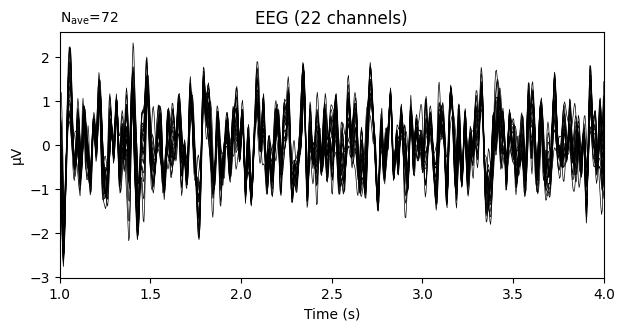

<Evoked | '770' (average, N=72), 1 – 4 sec, baseline off, 22 ch, ~155 kB>


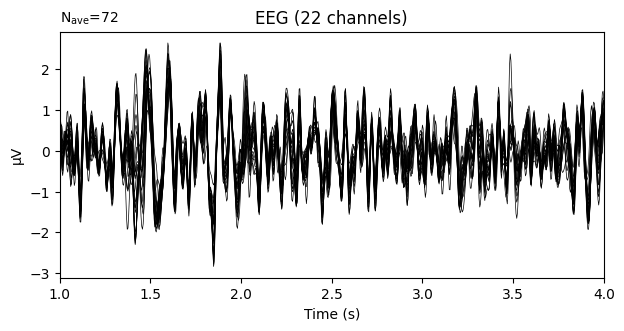

<Evoked | '771' (average, N=72), 1 – 4 sec, baseline off, 22 ch, ~155 kB>


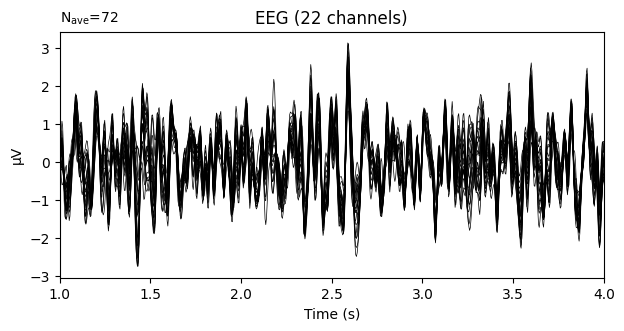

<Evoked | '772' (average, N=72), 1 – 4 sec, baseline off, 22 ch, ~155 kB>


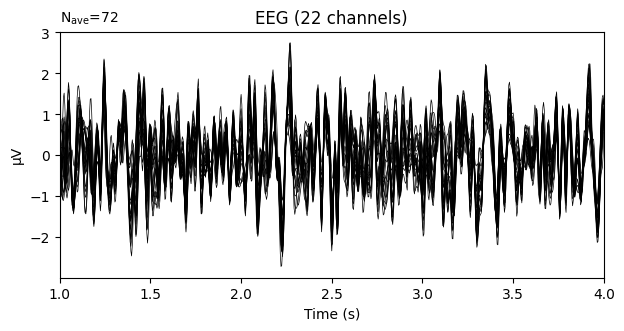

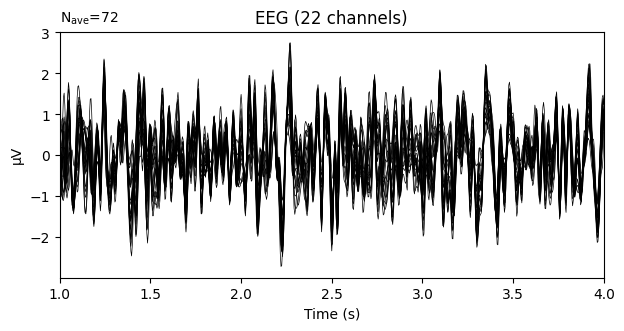

In [6]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot
evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot
evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot
evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot
evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

# 4. Labels and Data

In [7]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 
data = epochs.get_data()

In [8]:
np.shape(labels)

(288,)

# 5. Wavelet Packet Decomposition

In [9]:
import pywt

# signal is decomposed to level 5 with 'db4' wavelet
def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
    return Bands

wpd_data = feature_bands(data)


np.shape(wpd_data)


(8, 288, 22, 30)

# 6. Common Spatial Pattern Filtering

In [10]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc = []
ka = []
prec = []
recall = []
f1_score = []

for train_idx, test_idx in cv.split(labels):

    Csp = [];ss = [] # empty lists
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    # CSP filter applied separately for all Frequency band coefficients
    
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)


Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 22 dim * 1.8e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 22 dim * 1.7e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    

    Using tolerance 7e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.8e-06 (2.2e-16 eps * 22 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

    Using tolerance 9.3e-06 (2.2e-16 eps * 22 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4e-06 (2.2e-16 eps * 22 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

    Using tolerance 6.3e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

    Using tolerance 6.1e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.6e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

    Using tolerance 9.8e-06 (2.2e-16 eps * 22 dim * 2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 22 dim * 2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 22 dim * 1.5e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.9e-07 (2.2e-16 eps * 22 dim * 1.6e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.3e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4e-06 (2.2e-16 eps * 22 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

In [11]:
np.shape(X_train)


(230, 32)

# 7 (a). LDA Classifier Model

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment 

In [14]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time 
from scipy import stats
from pstats import Stats
import sys
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import io
import csv

lda = LDA(n_components = 2)

import numpy as np

print ("The shape of X_train at the start is", np.shape(X_train))


#LDA dimensionality reduction 
X_train = lda.fit_transform(X_train, label_train)
X_test = lda.transform(X_test)

print ("The shape of X_train after performing the LDA dimensionality reduction is", np.shape(X_train))

def LDA():

    import time
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import f1_score
    
    # Fitting Logistic Regression to the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, label_train)

    # Predicting the Test set results
    lda_predict = classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, lda_predict)

    target_names = ['class 0', 'class 1', 'class 2', 'class 3']

    print('Accuracy Score:', accuracy_score(label_test, lda_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, lda_predict))
    print('Classification \n', classification_report(label_test, lda_predict, target_names=target_names ))
    
    lda_acc = accuracy_score(label_test, lda_predict)
    print('Accuracy: %f' % lda_acc)
    lda_ka = cohen_kappa_score(label_test, lda_predict)
    print('Cohen Kappa: %f' % lda_ka)
    lda_prec = precision_score(label_test, lda_predict, average='weighted')
    print('Precision: %f' % lda_prec)
    lda_rec = recall_score(label_test, lda_predict,average='weighted')
    print('Recall: %f' % lda_rec)
    lda_f1_score = f1_score(label_test, lda_predict, average='weighted')
    print('f1_score: %f' % lda_f1_score)

    # The Matthews correlation coefficient (MCC)
    lda_mcc= matthews_corrcoef(label_test,lda_predict)
    print(f'MCC: {round(lda_mcc,2)}')

    # Measuring the training time
    start = time.time()
    classifier.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    classifier.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")   
    

#Initialize profile class and call LDA() function
profiler = cProfile.Profile()
profiler.enable()
LDA()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('LDA.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


The shape of X_train at the start is (230, 2)
The shape of X_train after performing the LDA dimensionality reduction is (230, 2)
Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[11  1  0  0]
 [ 3 13  2  0]
 [ 1  0  6  3]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

     class 0       0.69      0.92      0.79        12
     class 1       0.93      0.72      0.81        18
     class 2       0.55      0.60      0.57        10
     class 3       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.75      0.75      0.74        58
weighted avg       0.78      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.675719
Precision: 0.780041
Recall: 0.758621
f1_score: 0.761515
MCC: 0.68
Training time:  0.015994548797607422 seconds
Inference time:  0.001003265380859375 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak mem

In [13]:
import numpy as np
np.shape(X_train)

(230, 2)

# 7(b). LDA- cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0       12    0.000      0.0    0.000        0.0   
1        8    0.000      0.0    0.000        0.0   
2      222    0.000      0.0    0.001        0.0   
3      108    0.000      0.0    0.000        0.0   
4      190    0.000      0.0    0.001        0.0   
..     ...      ...      ...      ...        ...   
492     20    0.000      0.0    0.000        0.0   
493      1    0.000      0.0    0.000        0.0   
494      2    0.000      0.0    0.000        0.0   
495      4    0.000      0.0    0.000        0.0   
496      2    0.001      0.0    0.001        0.0   

                             filename:lineno(function)   Bracketed String  
0            <frozen importlib._bootstrap>:398(parent)             parent  
1    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
2    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck__  
3    C:\Users\apple\anaconda3\lib\abc.py:121(__subc...  __subclasscheck

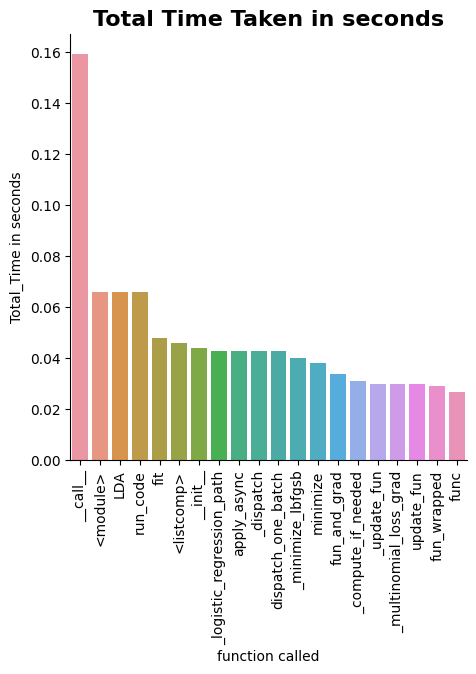

In [112]:
import pandas as pd
import re

df = pd.read_csv('LDA.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('LDA_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('LDA_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('LDA_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()




# 8 (a). KNN Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [15]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time 
from scipy import stats
from pstats import Stats
import sys
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def KNN():

    import time
    from sklearn import neighbors, datasets, preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import f1_score

    # Modeling KNN classifiers.
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, label_train)
    kn_predict = knn.predict(X_test)

    # Display the Output
    print('Accuracy Score:', accuracy_score(label_test, kn_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, kn_predict))
    print('Classification \n', classification_report(label_test, kn_predict))
    
    knn_acc = accuracy_score(label_test, kn_predict)
    print('Accuracy: %f' % knn_acc)
    knn_ka = cohen_kappa_score(label_test, kn_predict)
    print('Cohen Kappa: %f' % knn_ka)
    knn_prec = precision_score(label_test, kn_predict, average='weighted')
    print('Precision: %f' % knn_prec)
    knn_rec = recall_score(label_test, kn_predict, average='weighted')
    print('Recall: %f' % knn_rec)
    knn_f1_score = f1_score(label_test, kn_predict, average='weighted')
    print('f1_score: %f' % knn_f1_score)
    
    # The Matthews correlation coefficient (MCC)
    knn_mcc= matthews_corrcoef(label_test,kn_predict)
    print(f'MCC: {round(knn_mcc,2)}')

    # Measuring the training time
    start = time.time()
    knn.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    knn.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    
#Initialize profile class and call KNN() function
profiler = cProfile.Profile()
profiler.enable()
KNN()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('KNN.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()
    

Accuracy Score: 0.7241379310344828
Confusion matrix 
 [[ 9  3  0  0]
 [ 3 14  1  0]
 [ 1  0  5  4]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

           1       0.64      0.75      0.69        12
           2       0.82      0.78      0.80        18
           3       0.56      0.50      0.53        10
           4       0.78      0.78      0.78        18

    accuracy                           0.72        58
   macro avg       0.70      0.70      0.70        58
weighted avg       0.73      0.72      0.72        58

Accuracy: 0.724138
Cohen Kappa: 0.625202
Precision: 0.725748
Recall: 0.724138
f1_score: 0.723635
MCC: 0.63
Training time:  0.000980377197265625 seconds
Inference time:  0.0029981136322021484 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 985.10 MiB, increment: 391.27 MiB


# 8(b). KNN- cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1      0.0      0.0    0.024      0.024   
1       12      0.0      0.0    0.000      0.000   
2        7      0.0      0.0    0.000      0.000   
3      199      0.0      0.0    0.000      0.000   
4      105      0.0      0.0    0.000      0.000   
..     ...      ...      ...      ...        ...   
447     20      0.0      0.0    0.000      0.000   
448     20      0.0      0.0    0.000      0.000   
449     18      0.0      0.0    0.000      0.000   
450      1      0.0      0.0    0.000      0.000   
451      3      0.0      0.0    0.000      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                KNN  
1            <frozen importlib._bootstrap>:398(parent)             parent  
2    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
3    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck

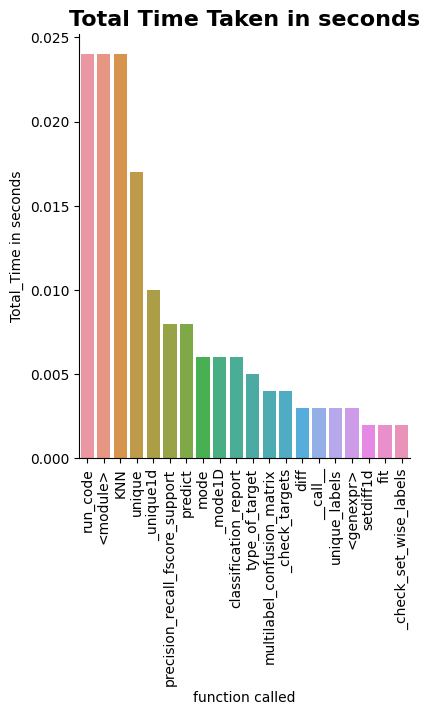

In [83]:
import pandas as pd
import re

df = pd.read_csv('KNN.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('KNN_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('KNN_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('KNN_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 9 (a). SVM Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [20]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time 
from scipy import stats
from pstats import Stats
import sys

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def SVM():
    
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling SVM classifiers.
    svm = SVC()
    svm.fit(X_train, label_train)
    svm_predict= svm.predict(X_test)

    print('Accuracy Score:', accuracy_score(label_test, svm_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, svm_predict))
    print('Classification \n', classification_report(label_test, svm_predict))
    
    svm_acc = accuracy_score(label_test, svm_predict)
    print('Accuracy: %f' % svm_acc)
    svm_ka = cohen_kappa_score(label_test, svm_predict)
    print('Cohen Kappa: %f' % svm_ka)
    svm_prec = precision_score(label_test, svm_predict, average='weighted')
    print('Precision: %f' % svm_prec)
    svm_rec = recall_score(label_test, svm_predict, average='weighted')
    print('Recall: %f' % svm_rec)
    svm_f1_score = f1_score(label_test, svm_predict, average='weighted')
    print('f1_score: %f' % svm_f1_score)

    # from sklearn.metrics import matthews_corrcoef
    svm_mcc= matthews_corrcoef(label_test,svm_predict)
    print(f'MCC: {round(svm_mcc,2)}')

    # Measuring the training time
    start = time.time()
    svm.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    svm.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")


#Initialize profile class and call SVM() function
profiler = cProfile.Profile()
profiler.enable()
SVM()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('SVM.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[10  1  1  0]
 [ 3 14  1  0]
 [ 1  0  6  3]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       0.93      0.78      0.85        18
           3       0.55      0.60      0.57        10
           4       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.74      0.75      0.74        58
weighted avg       0.78      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.674940
Precision: 0.777208
Recall: 0.758621
f1_score: 0.763378
MCC: 0.68
Training time:  0.0029990673065185547 seconds
Inference time:  0.002019166946411133 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 955.59 MiB, increment: 358.51 MiB


# 9 (b). SVM - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1      0.0      0.0      0.0        0.0   
1        8      0.0      0.0      0.0        0.0   
2        9      0.0      0.0      0.0        0.0   
3      185      0.0      0.0      0.0        0.0   
4       97      0.0      0.0      0.0        0.0   
..     ...      ...      ...      ...        ...   
315     18      0.0      0.0      0.0        0.0   
316     22      0.0      0.0      0.0        0.0   
317      1      0.0      0.0      0.0        0.0   
318      3      0.0      0.0      0.0        0.0   
319      2      0.0      0.0      0.0        0.0   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...           <module>  
1            <frozen importlib._bootstrap>:398(parent)             parent  
2    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
3    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck

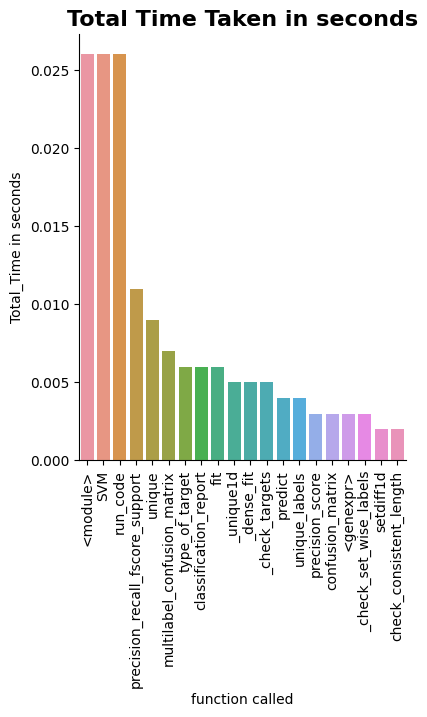

In [85]:
import pandas as pd
import re

df = pd.read_csv('SVM.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('SVM_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('SVM_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('SVM_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 10 (a). Random Forest (RF) Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [21]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time 
from scipy import stats
from pstats import Stats
import sys

#from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def RF():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling RF classifiers.
    
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train,label_train)
    rf_predict= rf_classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, rf_predict)

    print('Accuracy Score:', accuracy_score(label_test, rf_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, rf_predict))
    print('Classification \n', classification_report(label_test, rf_predict))
    
    rf_acc = accuracy_score(label_test, rf_predict)
    print('Accuracy: %f' % rf_acc)
    rf_ka = cohen_kappa_score(label_test, rf_predict)
    print('Cohen Kappa: %f' % rf_ka)
    rf_prec = precision_score(label_test, rf_predict, average='weighted')
    print('Precision: %f' % rf_prec)
    rf_rec = recall_score(label_test, rf_predict, average='weighted')
    print('Recall: %f' % rf_rec)
    rf_f1_score = f1_score(label_test, rf_predict, average='weighted')
    print('f1_score: %f' % rf_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    rf_mcc= matthews_corrcoef(label_test,rf_predict)
    print(f'MCC: {round(rf_mcc,2)}')
    
    # Measuring the training time
    start = time.time()
    rf_classifier.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    rf_classifier.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    

#Initialize profile class and call RF() function
profiler = cProfile.Profile()
profiler.enable()
RF()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('RF.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[10  2  0  0]
 [ 2 14  2  0]
 [ 1  0  6  3]
 [ 0  0  4 14]]
Classification 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.88      0.78      0.82        18
           3       0.50      0.60      0.55        10
           4       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.74      0.75      0.74        58
weighted avg       0.77      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.674419
Precision: 0.772488
Recall: 0.758621
f1_score: 0.763415
MCC: 0.68
Training time:  0.22391700744628906 seconds
Inference time:  0.02400946617126465 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 955.18 MiB, increment: 357.88 MiB


# 10 (b). RF - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1    0.000      0.0    0.463      0.463   
1        1    0.000      0.0    0.000      0.000   
2      606    0.001      0.0    0.001      0.000   
3        7    0.000      0.0    0.000      0.000   
4     3004    0.001      0.0    0.006      0.000   
..     ...      ...      ...      ...        ...   
471   1000    0.000      0.0    0.000      0.000   
472      1    0.000      0.0    0.000      0.000   
473      4    0.000      0.0    0.000      0.000   
474    400    0.004      0.0    0.009      0.000   
475    400    0.041      0.0    0.041      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                 RF  
1    C:\Users\apple\AppData\Local\Temp\ipykernel_26...           <module>  
2            <frozen importlib._bootstrap>:398(parent)             parent  
3    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromli

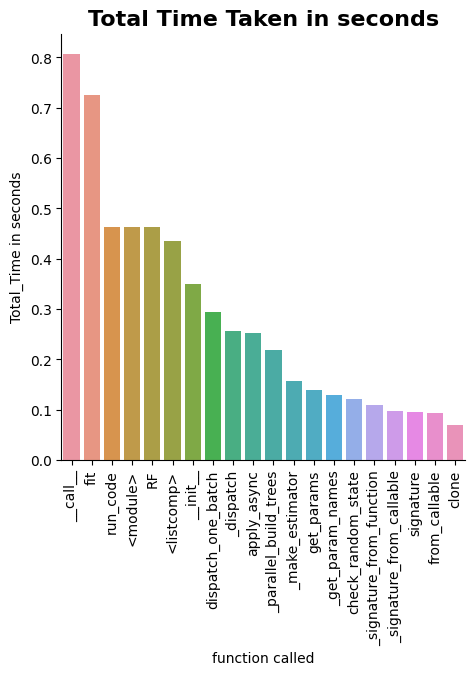

In [87]:
import pandas as pd
import re

df = pd.read_csv('RF.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('RF_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('RF_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('RF_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 11 (a). Logistic Regression (LR) Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [23]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def LR():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling RF classifiers.
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train,label_train)
    lr_predict = lr_classifier.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, lr_predict)

    print('Accuracy Score:', accuracy_score(label_test, lr_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, lr_predict))
    print('Classification \n', classification_report(label_test, lr_predict))
    
    lr_acc = accuracy_score(label_test, lr_predict)
    print('Accuracy: %f' % lr_acc)
    lr_ka = cohen_kappa_score(label_test, lr_predict)
    print('Cohen Kappa: %f' % lr_ka)
    lr_prec = precision_score(label_test, lr_predict, average='weighted')
    print('Precision: %f' % lr_prec)
    lr_rec = recall_score(label_test, lr_predict, average='weighted')
    print('Recall: %f' % lr_rec)
    lr_f1_score = f1_score(label_test, lr_predict, average='weighted')
    print('f1_score: %f' % lr_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    lr_mcc= matthews_corrcoef(label_test,lr_predict)
    print(f'MCC: {round(lr_mcc,2)}')
    
    # Measuring the training time
    start = time.time()
    lr_classifier.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    lr_classifier.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")

#Initialize profile class and call KNN() function
profiler = cProfile.Profile()
profiler.enable()
LR()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('LR.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[11  1  0  0]
 [ 3 13  2  0]
 [ 1  0  6  3]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

           1       0.69      0.92      0.79        12
           2       0.93      0.72      0.81        18
           3       0.55      0.60      0.57        10
           4       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.75      0.75      0.74        58
weighted avg       0.78      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.675719
Precision: 0.780041
Recall: 0.758621
f1_score: 0.761515
MCC: 0.68
Training time:  0.014996767044067383 seconds
Inference time:  0.0010001659393310547 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 801.29 MiB, increment: 364.29 MiB


# 11 (b). LR - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1      0.0      0.0    0.055      0.055   
1       12      0.0      0.0    0.000      0.000   
2        9      0.0      0.0    0.000      0.000   
3      218      0.0      0.0    0.000      0.000   
4      106      0.0      0.0    0.000      0.000   
..     ...      ...      ...      ...        ...   
495     21      0.0      0.0    0.000      0.000   
496     20      0.0      0.0    0.000      0.000   
497      1      0.0      0.0    0.000      0.000   
498      2      0.0      0.0    0.000      0.000   
499      4      0.0      0.0    0.000      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                 LR  
1            <frozen importlib._bootstrap>:398(parent)             parent  
2    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
3    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck

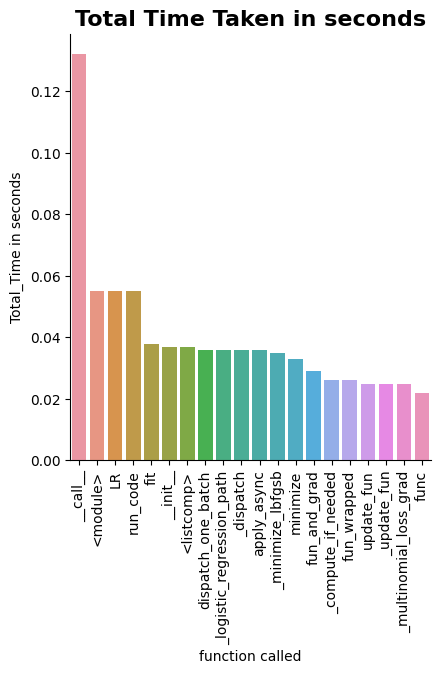

In [89]:
import pandas as pd
import re

df = pd.read_csv('LR.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('LR_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('LR_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('LR_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 12 (a). Naive Bayes (NB) Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [30]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def NB():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling NB classifiers.
    nb = GaussianNB()
    nb.fit(X_train, label_train)
    nb_predict= nb.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, nb_predict)

    print('Accuracy Score:', accuracy_score(label_test, nb_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, nb_predict))
    print('Classification \n', classification_report(label_test, nb_predict))
    
    nb_acc = accuracy_score(label_test, nb_predict)
    print('Accuracy: %f' % nb_acc)
    nb_ka = cohen_kappa_score(label_test, nb_predict)
    print('Cohen Kappa: %f' % nb_ka)
    nb_prec = precision_score(label_test, nb_predict, average='weighted')
    print('Precision: %f' % nb_prec)
    nb_rec = recall_score(label_test, nb_predict, average='weighted')
    print('Recall: %f' % nb_rec)
    nb_f1_score = f1_score(label_test, nb_predict, average='weighted')
    print('f1_score: %f' % nb_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    nb_mcc= matthews_corrcoef(label_test,nb_predict)
    print(f'MCC: {round(nb_mcc,2)}')
    
    # Measuring the training time
    start = time.time()
    nb.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    nb.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")

#Initialize profile class and call KNN() function
profiler = cProfile.Profile()
profiler.enable()
NB()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('NB.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[ 9  2  1  0]
 [ 2 15  1  0]
 [ 1  0  6  3]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       0.88      0.83      0.86        18
           3       0.55      0.60      0.57        10
           4       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.77      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.673371
Precision: 0.766692
Recall: 0.758621
f1_score: 0.761773
MCC: 0.67
Training time:  0.0010004043579101562 seconds
Inference time:  0.0009992122650146484 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 762.34 MiB, increment: 379.53 MiB


# 12 (b). NB - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1      0.0      0.0    0.033      0.033   
1        1      0.0      0.0    0.000      0.000   
2        1      0.0      0.0    0.000      0.000   
3        1      0.0      0.0    0.033      0.033   
4        2      0.0      0.0    0.005      0.002   
..     ...      ...      ...      ...        ...   
307      1      0.0      0.0    0.000      0.000   
308     21      0.0      0.0    0.000      0.000   
309     18      0.0      0.0    0.000      0.000   
310      1      0.0      0.0    0.000      0.000   
311      4      0.0      0.0    0.000      0.000   

                             filename:lineno(function) Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...               NB  
1    C:\Users\apple\anaconda3\lib\site-packages\skl...         __init__  
2    C:\Users\apple\AppData\Local\Temp\ipykernel_26...         <module>  
3    C:\Users\apple\AppData\Local\Temp\ipykernel_26...         <module>  
4    

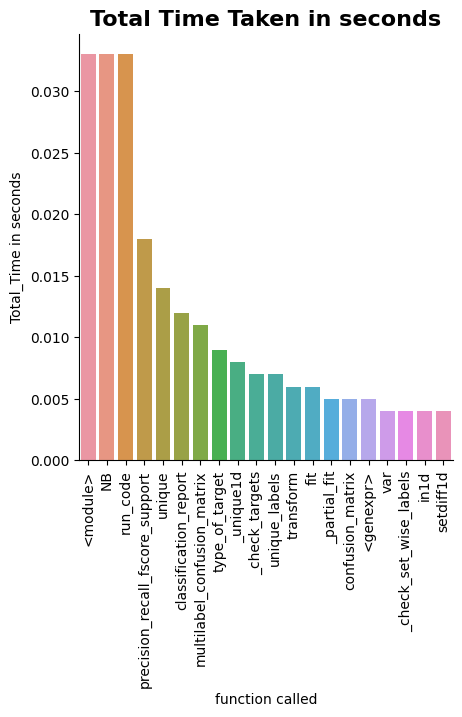

In [91]:
import pandas as pd
import re

df = pd.read_csv('NB.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('NB_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('NB_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('NB_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 13 (a). Decision Tree (DT) Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [39]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def DT():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling DT classifiers.  
    param={
    'max_depth':[2,6,10,40,70,100],
    'min_samples_split':[5,10,100,500]
    }

    dt = DecisionTreeClassifier(max_depth=2,min_samples_split=5)
    dt.fit(X_train, label_train)
    dt_predict= dt.predict(X_test)

    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, dt_predict)

    print('Accuracy Score:', accuracy_score(label_test, dt_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, dt_predict))
    print('Classification \n', classification_report(label_test, dt_predict))
    
    dt_acc = accuracy_score(label_test, dt_predict)
    print('Accuracy: %f' % dt_acc)
    dt_ka = cohen_kappa_score(label_test, dt_predict)
    print('Cohen Kappa: %f' % dt_ka)
    dt_prec = precision_score(label_test, dt_predict, average='weighted')
    print('Precision: %f' % dt_prec)
    dt_rec = recall_score(label_test, dt_predict, average='weighted')
    print('Recall: %f' % dt_rec)
    dt_f1_score = f1_score(label_test, dt_predict, average='weighted')
    print('f1_score: %f' % dt_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    dt_mcc= matthews_corrcoef(label_test,dt_predict)
    print(f'MCC: {round(dt_mcc,2)}')

    # Measuring the training time
    start = time.time()
    dt.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    dt.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    
#Initialize profile class and call DT() function
profiler = cProfile.Profile()
profiler.enable()
DT()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('DT.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.8103448275862069
Confusion matrix 
 [[10  2  0  0]
 [ 2 15  1  0]
 [ 1  0  7  2]
 [ 0  0  3 15]]
Classification 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.88      0.83      0.86        18
           3       0.64      0.70      0.67        10
           4       0.88      0.83      0.86        18

    accuracy                           0.81        58
   macro avg       0.79      0.80      0.80        58
weighted avg       0.82      0.81      0.81        58

Accuracy: 0.810345
Cohen Kappa: 0.743363
Precision: 0.816536
Recall: 0.810345
f1_score: 0.812479
MCC: 0.74
Training time:  0.001999378204345703 seconds
Inference time:  0.0009984970092773438 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 732.52 MiB, increment: 370.64 MiB


# 13 (b). DT - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1      0.0      0.0    0.000      0.000   
1        1      0.0      0.0    0.018      0.018   
2        6      0.0      0.0    0.000      0.000   
3        7      0.0      0.0    0.000      0.000   
4      196      0.0      0.0    0.000      0.000   
..     ...      ...      ...      ...        ...   
312      1      0.0      0.0    0.000      0.000   
313     19      0.0      0.0    0.000      0.000   
314     20      0.0      0.0    0.000      0.000   
315      1      0.0      0.0    0.000      0.000   
316      4      0.0      0.0    0.000      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...           <module>  
1    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                 DT  
2            <frozen importlib._bootstrap>:398(parent)             parent  
3    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromli

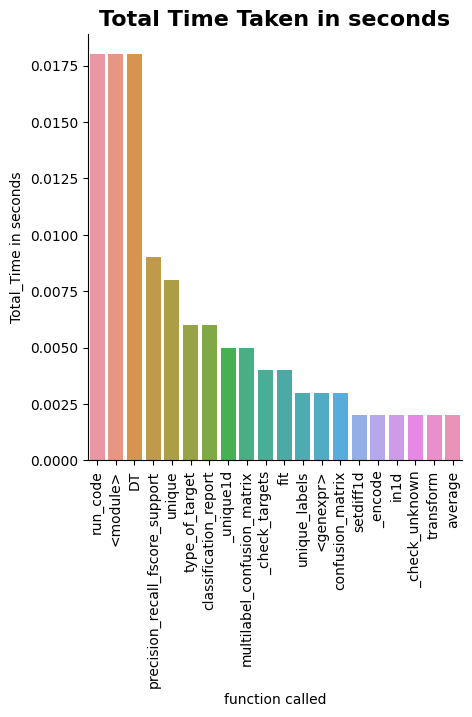

In [93]:
import pandas as pd
import re

df = pd.read_csv('DT.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('DT_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('DT_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('DT_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 14 (a). Ensemble Bagging (EB) Classifier Model

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [40]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def B():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling EB classifiers.  
    param={
    'base_estimator':[None, SVC()],
    'n_estimators':[2,5,10,20,30,40],
    }

    b_classifier=BaggingClassifier(base_estimator=SVC(),n_estimators=10)
    b_classifier.fit(X_train, label_train)
    b_predict= b_classifier.predict(X_test)
  
    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, b_predict)

    print('Accuracy Score:', accuracy_score(label_test, b_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, b_predict))
    print('Classification \n', classification_report(label_test, b_predict))
    
    b_acc = accuracy_score(label_test, b_predict)
    print('Accuracy: %f' % b_acc)
    b_ka = cohen_kappa_score(label_test, b_predict)
    print('Cohen Kappa: %f' % b_ka)
    b_prec = precision_score(label_test, b_predict, average='weighted')
    print('Precision: %f' % b_prec)
    b_rec = recall_score(label_test, b_predict, average='weighted')
    print('Recall: %f' % b_rec)
    b_f1_score = f1_score(label_test, b_predict, average='weighted')
    print('f1_score: %f' % b_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    b_mcc= matthews_corrcoef(label_test,b_predict)
    print(f'MCC: {round(b_mcc,2)}')

    # Measuring the training time
    start = time.time()
    b_classifier.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    b_classifier.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")

#Initialize profile class and call B() function
profiler = cProfile.Profile()
profiler.enable()
B()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('B.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7586206896551724
Confusion matrix 
 [[10  1  1  0]
 [ 3 14  1  0]
 [ 1  0  6  3]
 [ 1  0  3 14]]
Classification 
               precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       0.93      0.78      0.85        18
           3       0.55      0.60      0.57        10
           4       0.82      0.78      0.80        18

    accuracy                           0.76        58
   macro avg       0.74      0.75      0.74        58
weighted avg       0.78      0.76      0.76        58

Accuracy: 0.758621
Cohen Kappa: 0.674940
Precision: 0.777208
Recall: 0.758621
f1_score: 0.763378
MCC: 0.68
Training time:  0.029990434646606445 seconds
Inference time:  0.008997440338134766 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 722.86 MiB, increment: 360.98 MiB


# 14 (b). EB - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1    0.000      0.0    0.068      0.068   
1        1    0.000      0.0    0.000      0.000   
2       86    0.000      0.0    0.000      0.000   
3        7    0.000      0.0    0.000      0.000   
4      584    0.000      0.0    0.001      0.000   
..     ...      ...      ...      ...        ...   
463     82    0.000      0.0    0.000      0.000   
464      1    0.000      0.0    0.000      0.000   
465      4    0.000      0.0    0.000      0.000   
466     42    0.001      0.0    0.001      0.000   
467     60    0.006      0.0    0.006      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                  B  
1    C:\Users\apple\AppData\Local\Temp\ipykernel_26...           <module>  
2            <frozen importlib._bootstrap>:398(parent)             parent  
3    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromli

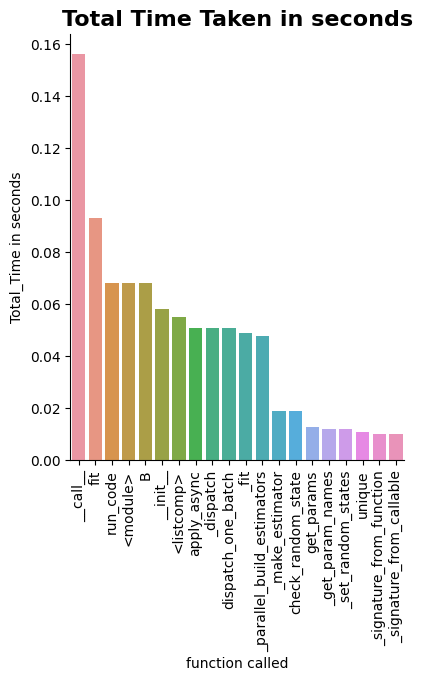

In [95]:
import pandas as pd
import re

df = pd.read_csv('B.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('B_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('B_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('B_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 15 (a). Ensemble Boosting (ADA) Classifier Model

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [44]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def ADA():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling ADA classifiers.
    param={
    'n_estimators':[2,5,10,20,30,40],
    'learning_rate':[1.0,2.0,3.0,4.0],
    }

    ada_classifier=AdaBoostClassifier(learning_rate=1.0,n_estimators=2,random_state=42)
    ada_classifier.fit(X_train, label_train)
    ada_predict= ada_classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(label_test, ada_predict)

    print('Accuracy Score:', accuracy_score(label_test, ada_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, ada_predict))
    print('Classification \n', classification_report(label_test, ada_predict))
    
    ada_acc = accuracy_score(label_test, ada_predict)
    print('Accuracy: %f' % ada_acc)
    ada_ka = cohen_kappa_score(label_test, ada_predict)
    print('Cohen Kappa: %f' % ada_ka)
    ada_prec = precision_score(label_test, ada_predict, average='weighted')
    print('Precision: %f' % ada_prec)
    ada_rec = recall_score(label_test, ada_predict, average='weighted')
    print('Recall: %f' % ada_rec)
    ada_f1_score = f1_score(label_test, ada_predict, average='weighted')
    print('f1_score: %f' % ada_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    ada_mcc= matthews_corrcoef(label_test,ada_predict)
    print(f'MCC: {round(ada_mcc,2)}')
    
    # Measuring the training time
    start = time.time()
    ada_classifier.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    ada_classifier.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    

#Initialize profile class and call ADA() function
profiler = cProfile.Profile()
profiler.enable()
ADA()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('ADA.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.8103448275862069
Confusion matrix 
 [[10  2  0  0]
 [ 2 15  1  0]
 [ 1  0  7  2]
 [ 0  0  3 15]]
Classification 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.88      0.83      0.86        18
           3       0.64      0.70      0.67        10
           4       0.88      0.83      0.86        18

    accuracy                           0.81        58
   macro avg       0.79      0.80      0.80        58
weighted avg       0.82      0.81      0.81        58

Accuracy: 0.810345
Cohen Kappa: 0.743363
Precision: 0.816536
Recall: 0.810345
f1_score: 0.812479
MCC: 0.74
Training time:  0.004998445510864258 seconds
Inference time:  0.0009992122650146484 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 717.96 MiB, increment: 363.17 MiB


# 15 (b). ADA - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1    0.000      0.0    0.443      0.443   
1      506    0.001      0.0    0.002      0.000   
2        7    0.000      0.0    0.000      0.000   
3     1794    0.001      0.0    0.007      0.000   
4     1104    0.001      0.0    0.002      0.000   
..     ...      ...      ...      ...        ...   
390    402    0.000      0.0    0.000      0.000   
391      1    0.000      0.0    0.000      0.000   
392      4    0.000      0.0    0.000      0.000   
393    100    0.003      0.0    0.003      0.000   
394    100    0.022      0.0    0.022      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                ADA  
1            <frozen importlib._bootstrap>:398(parent)             parent  
2    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
3    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck

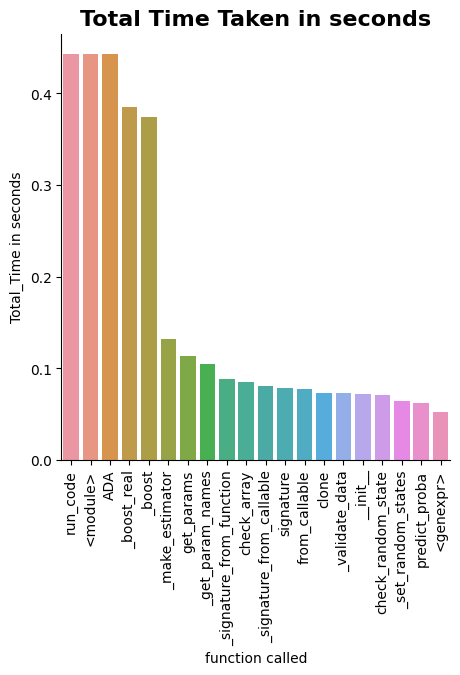

In [97]:
import pandas as pd
import re

df = pd.read_csv('ADA.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('ADA_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('ADA_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('ADA_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 16 (a). Ensemble Stacking (ES) Classifier Model

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [45]:
#!pip install mlxtend

import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier    
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, precision_score, recall_score    
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.svm import *

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def SC():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling ST classifiers.  
    ada_classifier = AdaBoostClassifier()
    rf = RandomForestClassifier(max_depth = 5, n_estimators=50,n_jobs=1)
    rf = RandomForestClassifier()
    
    lr = LogisticRegression()

    kn = KNeighborsClassifier(n_neighbors=10)
    kn.fit(X_train, label_train)

    #svm = SVC(C=0.0001, probability=True)
    svm = SVC()
    svm.fit(X_train, label_train)

    lda= LinearDiscriminantAnalysis()
    lda.fit(X_train,label_train)

    sig1 = CalibratedClassifierCV(lda )
    sig2 = CalibratedClassifierCV(ada_classifier)
    sig3 = CalibratedClassifierCV(kn)
    sig4 = CalibratedClassifierCV(rf)
    sig5 = CalibratedClassifierCV(lr)

    sclf = StackingClassifier(classifiers=[sig1, sig2, sig3, sig4, sig5 ], meta_classifier= LogisticRegression(C=0.001), use_probas= True, use_features_in_secondary= True)
    sclf.fit(X_train, label_train)  
    sc_predict= sclf.predict(X_test)
    
     # Making the Confusion Matrix
    cm = confusion_matrix(label_test, sc_predict)

    print('Accuracy Score:', accuracy_score(label_test, sc_predict))
    print('Confusion matrix \n',  confusion_matrix(label_test, sc_predict))
    print('Classification \n', classification_report(label_test, sc_predict))
    
    sc_acc = accuracy_score(label_test, sc_predict)
    print('Accuracy: %f' % sc_acc)
    sc_ka = cohen_kappa_score(label_test, sc_predict)
    print('Cohen Kappa: %f' % sc_ka)
    sc_prec = precision_score(label_test, sc_predict, average='weighted')
    print('Precision: %f' % sc_prec)
    sc_rec = recall_score(label_test, sc_predict, average='weighted')
    print('Recall: %f' % sc_rec)
    sc_f1_score = f1_score(label_test, sc_predict, average='weighted')
    print('f1_score: %f' % sc_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    sc_mcc= matthews_corrcoef(label_test,sc_predict)
    print(f'MCC: {round(sc_mcc,2)}')
        
    # Measuring the training time
    start = time.time()
    sclf.fit(X_train, label_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    sclf.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    
#Initialize profile class and call SC() function
profiler = cProfile.Profile()
profiler.enable()
SC()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('SC.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Accuracy Score: 0.7413793103448276
Confusion matrix 
 [[12  0  0  0]
 [ 4 12  2  0]
 [ 1  0  7  2]
 [ 1  0  5 12]]
Classification 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80        12
           2       1.00      0.67      0.80        18
           3       0.50      0.70      0.58        10
           4       0.86      0.67      0.75        18

    accuracy                           0.74        58
   macro avg       0.76      0.76      0.73        58
weighted avg       0.80      0.74      0.75        58

Accuracy: 0.741379
Cohen Kappa: 0.657480
Precision: 0.800493
Recall: 0.741379
f1_score: 0.747126
MCC: 0.67
Training time:  2.2182679176330566 seconds
Inference time:  0.16496729850769043 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 725.91 MiB, increment: 367.30 MiB


# 16 (b). ES - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1    0.000      0.0    4.751      4.751   
1     8980    0.009      0.0    0.014      0.000   
2       20    0.000      0.0    0.000      0.000   
3    25026    0.011      0.0    0.053      0.000   
4    14409    0.006      0.0    0.017      0.000   
..     ...      ...      ...      ...        ...   
722      1    0.000      0.0    0.000      0.000   
723     62    0.000      0.0    0.000      0.000   
724      4    0.000      0.0    0.000      0.000   
725   2501    0.028      0.0    0.048      0.000   
726   2500    0.255      0.0    0.255      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                 SC  
1            <frozen importlib._bootstrap>:398(parent)             parent  
2    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
3    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck

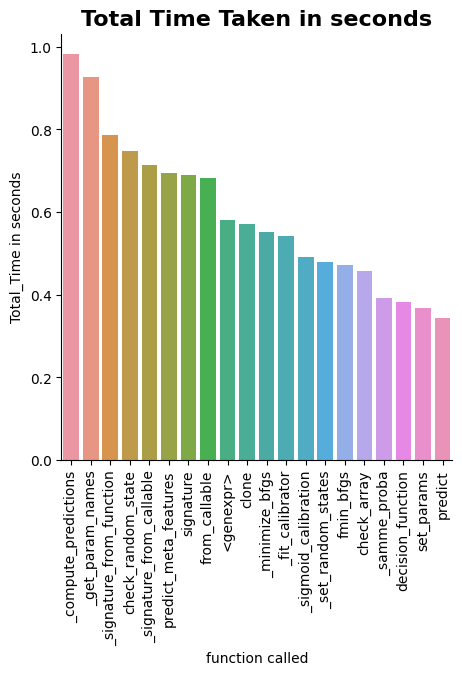

In [99]:
import pandas as pd
import re

df = pd.read_csv('SC.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('SC_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('SC_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('SC_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 17 (a). Riemannian Geometry Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [137]:
#!pip install pyriemann

import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

# pyriemann import
from pyriemann.classification import MDM, TSclassifier
from pyriemann.estimation import Covariances

# sklearn imports
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def RG():
    
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    from sklearn.pipeline import make_pipeline
    from pyriemann.estimation import XdawnCovariances
    from pyriemann.classification import MDM
    from sklearn.linear_model import LogisticRegression
    
    # cross validation
    # pyriemann import
    from pyriemann.classification import MDM, TSclassifier
    from pyriemann.estimation import Covariances
    from pyriemann.estimation import XdawnCovariances
    from pyriemann.tangentspace import TangentSpace

    # sklearn imports
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    import mne
    from mne import io
    from mne.datasets import sample
    
    n_components = 5  # pick some components

    # Define a monte-carlo cross-validation generator (reduce variance):
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    pr = np.zeros(len(labels))
    epochs_data = data

    clf = make_pipeline(XdawnCovariances(n_components), MDM())
    
    for train_idx, test_idx in cv.split(epochs_data):
        y_train, y_test = labels[train_idx], labels[test_idx]

        clf.fit(epochs_data[train_idx], y_train)
        pr[test_idx] = clf.predict(epochs_data[test_idx])

    print('Accuracy Score:', accuracy_score(labels, pr))
    print('Confusion matrix \n',  confusion_matrix(labels, pr))
    print('Classification \n', classification_report(labels, pr))
    
    rg_acc = accuracy_score(labels, pr)
    print('Accuracy: %f' % rg_acc)
    rg_ka = cohen_kappa_score(labels, pr)
    print('Cohen Kappa: %f' % rg_ka)
    rg_prec = precision_score(labels, pr, average='weighted')
    print('Precision: %f' % rg_prec)
    rg_rec = recall_score(labels, pr, average='weighted')
    print('Recall: %f' % rg_rec)
    rg_f1_score = f1_score(labels, pr, average='weighted')
    print('f1_score: %f' % rg_f1_score)
    
    # from sklearn.metrics import matthews_corrcoef
    rg_mcc= matthews_corrcoef(labels, pr)
    print(f'MCC: {round(rg_mcc,2)}')

    # Measuring the training time
    start = time.time()
    clf.fit(epochs_data[train_idx], y_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    clf.predict(epochs_data[test_idx])
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")

    
#Initialize profile class and call RG() function
profiler = cProfile.Profile()
profiler.enable()
RG()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('RG.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()

Accuracy Score: 0.6909722222222222
Confusion matrix 
 [[37 29  6  0]
 [ 9 60  3  0]
 [ 4  3 46 19]
 [ 0  0 16 56]]
Classification 
               precision    recall  f1-score   support

           1       0.74      0.51      0.61        72
           2       0.65      0.83      0.73        72
           3       0.65      0.64      0.64        72
           4       0.75      0.78      0.76        72

    accuracy                           0.69       288
   macro avg       0.70      0.69      0.69       288
weighted avg       0.70      0.69      0.69       288

Accuracy: 0.690972
Cohen Kappa: 0.587963
Precision: 0.696682
Recall: 0.690972
f1_score: 0.685882
MCC: 0.59
Training time:  1.2426207065582275 seconds
Inference time:  0.06798052787780762 seconds
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 693.41 MiB, increment: 353.13 MiB


# 17 (b). RG - cProfile results showing 20 most time-consuming tasks

    ncalls  tottime  percall  cumtime  percall.1  \
0        1    0.184    0.184   15.583     15.583   
1       12    0.000    0.000    0.000      0.000   
2      202    0.000    0.000    0.001      0.000   
3      104    0.000    0.000    0.000      0.000   
4      156    0.000    0.000    0.001      0.000   
..     ...      ...      ...      ...        ...   
482     12    0.000    0.000    0.000      0.000   
483      1    0.000    0.000    0.000      0.000   
484      3    0.000    0.000    0.000      0.000   
485      1    0.000    0.000    0.000      0.000   
486      1    0.000    0.000    0.000      0.000   

                             filename:lineno(function)   Bracketed String  
0    C:\Users\apple\AppData\Local\Temp\ipykernel_26...                 RG  
1    <frozen importlib._bootstrap>:1033(_handle_fro...   _handle_fromlist  
2    C:\Users\apple\anaconda3\lib\abc.py:117(__inst...  __instancecheck__  
3    C:\Users\apple\anaconda3\lib\abc.py:121(__subc...  __subclasscheck

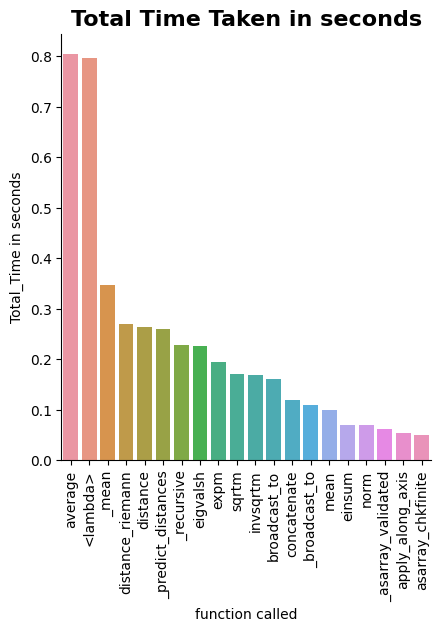

In [101]:
import pandas as pd
import re

df = pd.read_csv('RG.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('RG_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('RG_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('RG_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()


# 18 (a). ANN Classifier Model 

## - Metrics: Accuracy, Precision, Recall, F1_score, Cohen Kappa, and MCC 

## - Profiling: Inference time, Training time, Peak Memory & Increment

In [138]:
import cProfile 
import cProfile as profile
import pstats
import scipy
import time
from scipy import stats
from pstats import Stats
import sys

import warnings
warnings.filterwarnings("ignore")

import io
import csv

def ANN():

    import time
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import matthews_corrcoef
    from sklearn import metrics
    from sklearn.metrics import f1_score
    
    # Modeling ANN classifier  

    def build_classifier(num_layers = 0):
        classifier = Sequential()
        #First Layer
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))
        # Intermediate Layers
        for itr in range(num_layers):
            classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                                 kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
            classifier.add(Dropout(0.5))   
        # Last Layer
        classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
        classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
        return classifier
    
    for train_idx, test_idx in cv.split(labels):
        Csp = [];ss = [];nn = [] # empty lists
        label_train, label_test = labels[train_idx], labels[test_idx]
        y_train, y_test = X_out[train_idx], X_out[test_idx]
    
        # CSP filter applied separately for all Frequency band coefficients
        Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
        ss = preprocessing.StandardScaler()
        X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))
        X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
        
        nn = build_classifier()  
        start = time.time()
        nn.fit(X_train, y_train, batch_size = 10, epochs = 100)
        training_time = time.time() - start
        
        y_pred = nn.predict(X_test)
        y_pred=np.argmax(y_pred, axis=1)
        y_test=np.argmax(y_test, axis=1)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
    print('Classification \n', classification_report(y_test, y_pred))
    
    ann_acc = accuracy_score(y_test, y_pred)
    print('Accuracy: %f' % ann_acc)
    ann_ka = cohen_kappa_score(y_test, y_pred)
    print('Cohen Kappa: %f' % ann_ka)
    ann_prec = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %f' % ann_prec)
    ann_rec = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %f' % ann_rec)
    ann_f1_score = f1_score(y_test, y_pred, average='weighted')
    print('f1_score: %f' % ann_f1_score)
  
    # from sklearn.metrics import matthews_corrcoef
    ann_mcc= matthews_corrcoef(y_test,y_pred)
    print(f'MCC: {round(ann_mcc,2)}')
    
    # Measuring the training time
    start = time.time()
    nn.fit(X_train, y_train)
    training_time = time.time() - start
    print("Training time: ", training_time, "seconds")

    # Measuring the inference time
    start = time.time()
    nn.predict(X_test)
    inference_time = time.time() - start
    print("Inference time: ", inference_time, "seconds")
    
#Initialize profile class and call B() function
profiler = cProfile.Profile()
profiler.enable()
ANN()
profiler.disable()
stats = pstats.Stats(profiler).strip_dirs().sort_stats('cumtime')

# print stats to a string
result = io.StringIO()
pstats.Stats(profiler,stream=result).print_stats()
result=result.getvalue()

# chop the string into a csv-like buffer
result='ncalls'+result.split('ncalls')[-1]
result='\n'.join([','.join(line.rstrip().split(None,5)) for line in result.split('\n')])

# save it to disk
with open('ANN.csv', 'w+') as f:
    #f=open(result.rsplit('.')[0]+'.csv','w')
    f.write(result)
    f.close() 
    
!pip install memory_profiler
from memory_profiler import memory_usage

%load_ext memory_profiler

def my_func():
    data = []
    for i in range(10000000):
        data.append(i)

%memit my_func()


Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)


Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 22 dim * 1.8e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 22 dim * 1.7e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    

Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22

Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8652
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8739
Epoch 13/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8957
Epoch 14/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.9000
Epoch 15/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8957
Epoch 16/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8913
Epoch 17/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8913
Epoch 18/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8783
Epoch 19/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.9174
Epoch 20/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.9174


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 22 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-06 (2.2e-16 eps * 22 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-07 (2.2e-16 

23/23 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.9261
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9522
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9304
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9348
Epoch 66/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9130
Epoch 67/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9261
Epoch 68/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.9217
Epoch 69/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9435
Epoch 70/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9217
Epoch 71/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9565
Epoch 72/100


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    

    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.6e-06 (2.2e-16 eps * 22 dim * 2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -

23/23 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9696
Epoch 85/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.9609
Epoch 86/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9870
Epoch 87/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1809 - accuracy: 0.9565
Epoch 88/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9826
Epoch 89/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9652
Epoch 90/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9652
Epoch 91/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9652
Epoch 92/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9696
Epoch 93/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9565
Epoch 94/100


    Using tolerance 8.4e-06 (2.2e-16 eps * 22 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-06 (2.2e-16 eps * 22 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 22 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.5e-06 (2.2e-16 eps * 22 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 

Epoch 24/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.9304
Epoch 25/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.9043
Epoch 26/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.9087
Epoch 27/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9348
Epoch 28/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.9174
Epoch 29/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.9304
Epoch 30/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9130
Epoch 31/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.9174
Epoch 32/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.9304
Epoch 33/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.9217


    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance 

    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.9e-07 (2.2e-16 eps * 22 dim * 1.6e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-07 (2.2e-16 eps * 22 dim * 1.4e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 1.2053 - accuracy: 0.5913
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9368 - accuracy: 0.7391
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 

Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-06 (2.2e-16 eps * 22 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-06 (2.2e-16 eps * 22 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4e-06 (2.2e-16 eps * 22 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 22 dim * 1.8e+09  max singular v

# 18 (b). ANN - cProfile results showing 20 most time-consuming tasks

     ncalls  tottime  percall  cumtime  percall.1  \
0        90    0.004    0.000    0.030      0.000   
1         1    0.002    0.002  156.596    156.596   
2         1    0.000    0.000    0.000      0.000   
3         1    0.000    0.000    0.000      0.000   
4        90    0.043    0.000   71.759      0.797   
...     ...      ...      ...      ...        ...   
3487   5398    0.005    0.000    0.005      0.000   
3488      1    0.000    0.000    0.000      0.000   
3489      4    0.000    0.000    0.000      0.000   
3490     10    0.001    0.000    0.001      0.000   
3491      1    0.000    0.000    0.000      0.000   

                              filename:lineno(function) Bracketed String  
0     C:\Users\apple\AppData\Local\Temp\ipykernel_26...        <genexpr>  
1     C:\Users\apple\AppData\Local\Temp\ipykernel_26...              ANN  
2     C:\Users\apple\anaconda3\lib\site-packages\ker...         <module>  
3     C:\Users\apple\anaconda3\lib\site-packages\ker...        

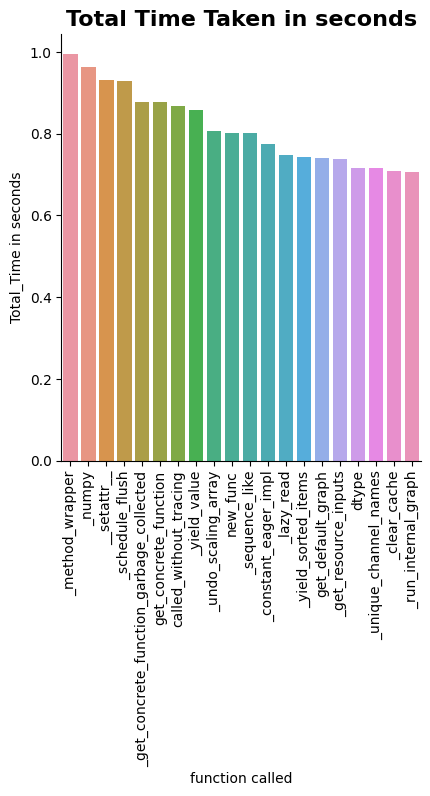

In [103]:
import pandas as pd
import re

df = pd.read_csv('ANN.csv',skipinitialspace=True)
df.columns   # Display Column names

# Function to extract strings in brackets
def extract_bracketed_string(string):
    if isinstance(string, str):
        match = re.search(r'\((.*?)\)', string)
        if match:
            return match.group(1)
    return None

# Create a new column with the extracted bracketed strings
df['Bracketed String'] = df['filename:lineno(function)'].apply(extract_bracketed_string)

# Output the resulting dataframe
print(df)
df.to_csv('ANN_1.csv', index=False)  #Save the dataframe to a CSV file

# Rename 'Bracketed String' column with 'module_name'
df.rename(columns={'Bracketed String':'module_name'},inplace=True)

# Drop the 'filename:lineno(function)' column
df1 = df.drop(columns=['filename:lineno(function)'])

print(df1)
df1.to_csv('ANN_2.csv', index=False)  #Save the dataframe to a CSV file

# Add the values of columns 'tottime' and 'cumtime' and store in column 'total_num_calls'
df1['total_num_calls'] = df['tottime'] + df['cumtime']

# Display the resulting dataframe
print(df1)
df1.to_csv('ANN_3.csv', index=False)  #Save the dataframe to a CSV file

# Create extra copy for safety 
df2=df1

# Adding same modules total time
df2 = df1.groupby(["module_name"])["total_num_calls"].sum()
df2 = pd.DataFrame(df2)
df2=df2.reset_index()
df2 = df2[df2['total_num_calls']<1]
df2 = df2.sort_values(by='total_num_calls',ascending=False)
df2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting
top20 = df2.head(20)
g=sns.catplot(x='module_name', y='total_num_calls', data=top20, kind='bar')
g.set_xticklabels(rotation=90)
g.set_xlabels("function called")
g.set_ylabels("Total_Time in seconds")
plt.title('Total Time Taken in seconds', weight='bold', fontsize=16)
plt.show()
